# Graficos

## RTT over hops

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import taller2
import seaborn as sns
import pandas as pd # name a more iconic duo
import matplotlib.pyplot as plt

In [3]:
sns.set_style("whitegrid")

In [4]:
# Levantamos los hops de alguna IP, extendemos con info geolocalizada, y graficamos
def get_df(ip: str):
    _, stats = taller2.deserialize(ip)
    taller2.extend_with_geo(stats)
    taller2.d_rtt(stats)
    
    df = pd.DataFrame(stats)
    df["hop"] = df.index
    return df[df["hop"] >= 1]

In [5]:
IP_DELHI = "14.139.45.149"
IP_CMU = "128.2.42.52"
IP_OSAKA = "133.1.138.1"

HOPS_OSAKA = 22
HOPS_DELHI = 15
HOPS_CMU = 15

df_osaka = get_df(IP_OSAKA)
df_cmu = get_df(IP_CMU)
df_delhi = get_df(IP_DELHI)

In [6]:
def rtt_over_hops(ax1, df: pd.DataFrame, hops: int):
    ax = sns.scatterplot(ax=ax1, data=df[df["hop"] <= hops], x="hop", y="median", hue="country_name", legend=False)
    ax.set(xlabel='Hop', ylabel='RTT (ms)')
    ax.set_title("RTT para cada hop")
    ax.set_xticks(range(1,hops+1))

def d_rtt_over_hops(ax1, df: pd.DataFrame, hops: int):
    ax = sns.scatterplot(ax=ax1, data=df[df["hop"] <= hops], x="hop", y="d_rtt", hue="country_name")
    ax.axhline(60, ls=':', lw=1.5, color="black")
    ax.set(xlabel='Hop', ylabel='dRTT (ms)')
    ax.set_title("dRTT para cada hop")
    ax.set_xticks(range(1,hops+1))

def plot_rtts(df, uni: str, ip: str, hops: int):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    fig.suptitle(f"{uni} ({ip})")
    d_rtt_over_hops(ax1, df, hops)
    rtt_over_hops(ax2, df, hops)

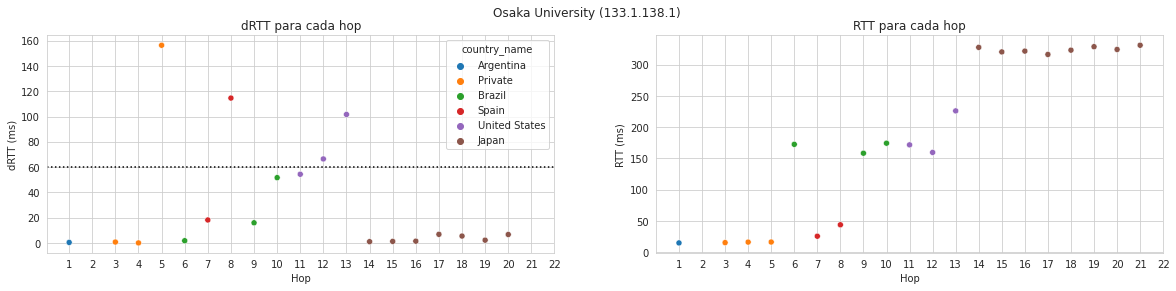

In [62]:
#rtt_over_hops(df, 15)
plot_rtts(df_osaka, "Osaka University", IP_OSAKA, HOPS_OSAKA)
plt.savefig("img/rtts-osaka.svg")

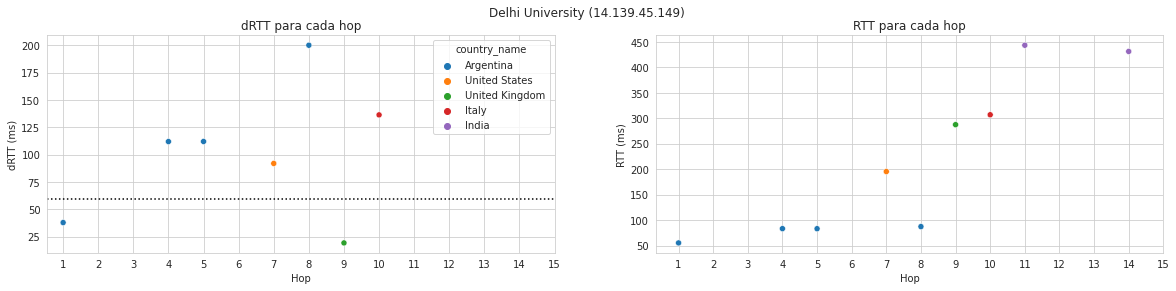

In [57]:
plot_rtts(df_delhi, "Delhi University", IP_DELHI, HOPS_DELHI)
plt.savefig("img/rtts-delhi.svg")

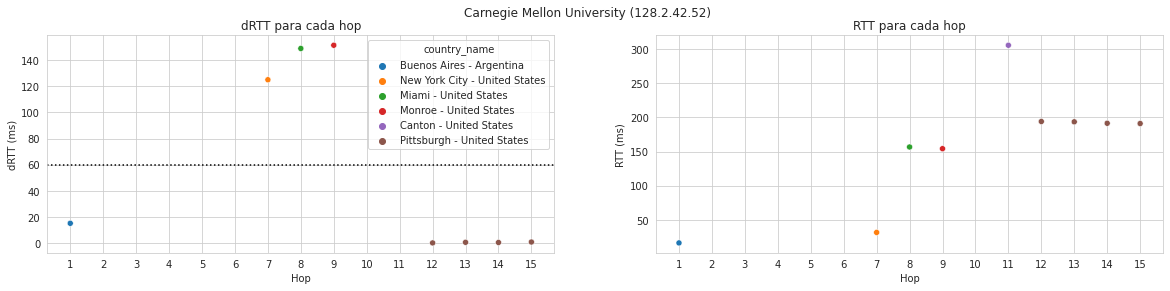

In [58]:
df_cmu["country_name"] = df_cmu["city"] + " - " + df_cmu["country_name"] 
plot_rtts(df_cmu, "Carnegie Mellon University", IP_CMU, HOPS_CMU)
plt.savefig("img/rtts-cmu.svg")

## Graficos de mapas

In [11]:
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import shapely.geometry
import numpy as np

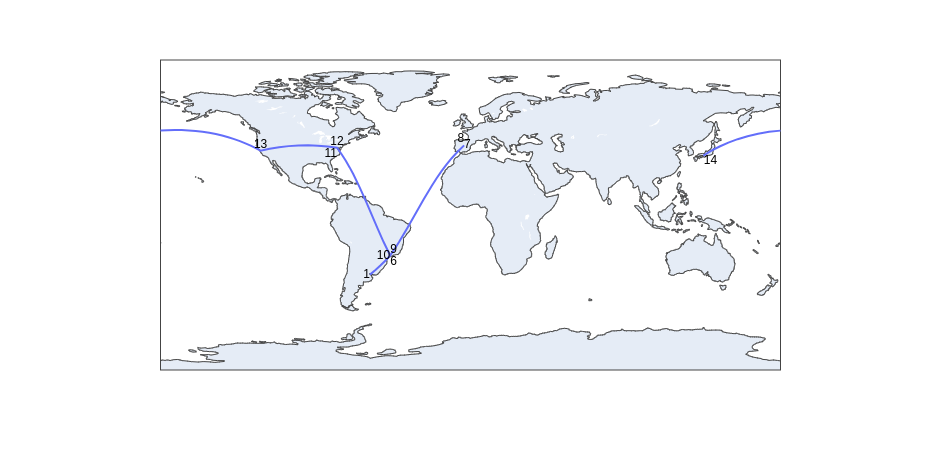

In [153]:
# https://plotly.com/python/lines-on-maps/
# https://plotly.com/python/static-image-export/

# OSAKA

df = get_df(IP_OSAKA)
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lat, df.long)).dropna()

fig = px.line_geo(lat=gdf.lat, lon=gdf.long)
#fig.update_traces(textposition='top center')

# ['top left', 'top center', 'top right', 'middle left', 'middle center', 'middle right', 'bottom left', 'bottom center', 'bottom right']
gdf["text_position"] = "top center"
gdf.at[1, "text_position"] = "middle left"
gdf.at[7, "text_position"] = "middle right"
gdf.at[8, "text_position"] = "top left"
gdf.at[6, "text_position"] = "bottom right"
gdf.at[9, "text_position"] = "top right"
gdf.at[10, "text_position"] = "middle left"
gdf.at[11, "text_position"] = "bottom left"
gdf.at[14, "text_position"] = "bottom right"


fig.add_trace(go.Scattergeo(lon=gdf["long"][:10],
              lat=gdf["lat"][:10],
              text=gdf["hop"][:10],
              textposition=gdf.text_position[:10],
              textfont={"size": 12, "color": "black"},
              mode='text',
              showlegend=False))

fig.write_image("img/geo-osaka.svg")
fig.show()


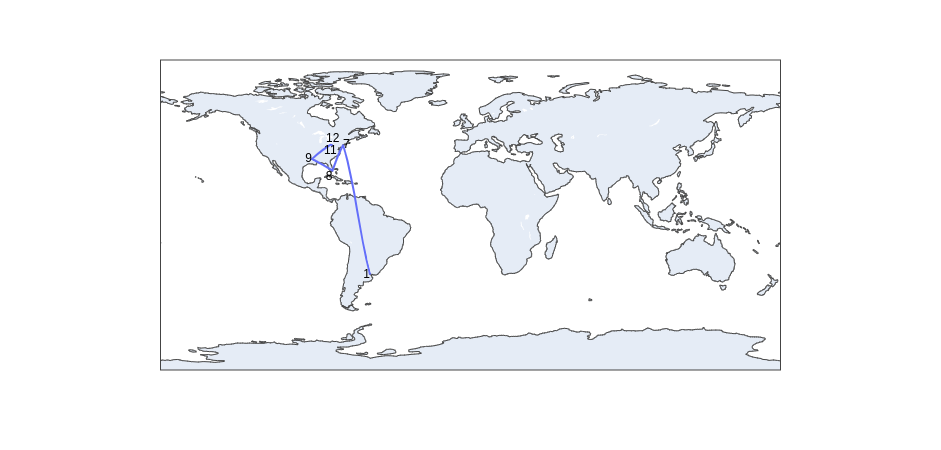

In [152]:
# https://plotly.com/python/lines-on-maps/
# https://plotly.com/python/static-image-export/

# CMU

df = get_df(IP_CMU)
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lat, df.long))
gdf = gdf[df['lat'].notna()]

fig = px.line_geo(lat=gdf.lat, lon=gdf.long)
#fig.update_traces(textposition='top center')

# ['top left', 'top center', 'top right', 'middle left', 'middle center', 'middle right', 'bottom left', 'bottom center', 'bottom right']
gdf["text_position"] = "top center"
gdf.at[1, "text_position"] = "middle left"
gdf.at[7, "text_position"] = "middle right"
gdf.at[8, "text_position"] = "bottom left"
gdf.at[6, "text_position"] = "bottom right"
gdf.at[9, "text_position"] = "middle left"
gdf.at[10, "text_position"] = "middle left"
gdf.at[11, "text_position"] = "bottom center"
gdf.at[12, "text_position"] = "top center"
gdf.at[14, "text_position"] = "bottom right"


fig.add_trace(go.Scattergeo(lon=gdf["long"][:6],
              lat=gdf["lat"][:6],
              text=gdf["hop"][:6],
              textposition=gdf.text_position[:6],
              textfont={"size": 12, "color": "black"},
              mode='text',
              showlegend=False))

fig.write_image("img/geo-cmu.svg")
fig.show()


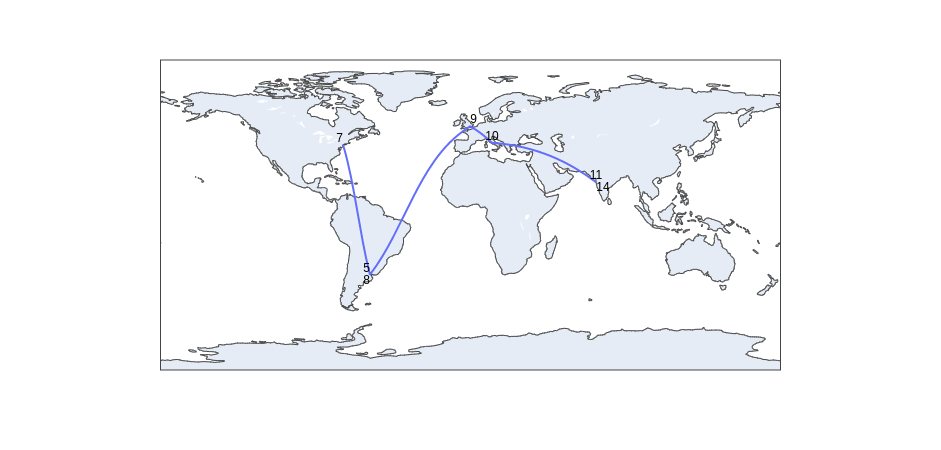

In [151]:
# https://plotly.com/python/lines-on-maps/
# https://plotly.com/python/static-image-export/

# CMU

df = get_df(IP_DELHI)
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lat, df.long))
gdf = gdf[df['lat'].notna()]

fig = px.line_geo(lat=gdf.lat, lon=gdf.long)
#fig.update_traces(textposition='top center')

# ['top left', 'top center', 'top right', 'middle left', 'middle center', 'middle right', 'bottom left', 'bottom center', 'bottom right']
gdf["text_position"] = "top center"
gdf.at[7, "text_position"] = "top left"
gdf.at[5, "text_position"] = "top left"
gdf.at[8, "text_position"] = "bottom left"
gdf.at[6, "text_position"] = "bottom right"
gdf.at[9, "text_position"] = "top right"
gdf.at[14, "text_position"] = "bottom right"



fig.add_trace(go.Scattergeo(lon=gdf["long"][2:9],
              lat=gdf["lat"][2:9],
              text=gdf["hop"][2:9],
              textposition=gdf.text_position[2:9],
              textfont={"size": 12, "color": "black"},
              mode='text',
              showlegend=False))

fig.write_image("img/geo-delhi.svg")
fig.show()


In [142]:
df[df["lat"].notna()].rest

,index,IP,median,sd,country_name,city,lat,long,org,d_rtt,hop,geometry
0,1,192.168.43.1,55.418491,27.696722,Private,Private,-34.6131,-58.3772,Private,38.056850,1,POINT (-34.61310 -58.37720)
1,4,181.96.96.181,83.448410,87.769196,Argentina,Buenos Aires,-34.6131,-58.3772,AS7303 Telecom Argentina S.A.,112.062693,4,POINT (-34.61310 -58.37720)
2,5,181.88.68.142,83.366156,12.460104,Argentina,Buenos Aires,-34.6131,-58.3772,AS7303 Telecom Argentina S.A.,112.144947,5,POINT (-34.61310 -58.37720)
3,7,181.96.113.234,195.511103,0.000000,United States,New York City,40.7143,-74.0060,AS7303 Telecom Argentina S.A.,92.077971,7,POINT (40.71430 -74.00600)
4,8,195.22.220.56,87.491512,15.567708,Argentina,Buenos Aires,-34.6131,-58.3772,AS6762 TELECOM ITALIA SPARKLE S.p.A.,200.097561,8,POINT (-34.61310 -58.37720)
5,9,195.22.209.220,287.589073,11.523454,United Kingdom,London,51.5085,-0.1257,AS6762 TELECOM ITALIA SPARKLE S.p.A.,19.458771,9,POINT (51.50850 -0.12570)
6,10,149.3.183.137,307.047844,18.788415,Italy,Rome,41.8919,12.5113,AS6762 TELECOM ITALIA SPARKLE S.p.A.,136.466503,10,POINT (41.89190 12.51130)
7,11,85.95.27.121,443.514347,91.465497,India,Mumbai,19.0728,72.8826,AS15412 Reliance Globalcom Limited,NaN,11,POINT (19.07280 72.88260)
8,14,124.124.195.101,431.315422,16.611614,India,Airoli,19.1510,72.9963,AS18101 Reliance Communications Ltd.DAKC MUMBAI,NaN,14,POINT (19.15100 72.99630)
